# 03 - Interactive Viz

## Deadline

Wednesday November 8th, 2017 at 11:59PM

## Important Notes

- Make sure you push on GitHub your Notebook with all the cells already evaluated
- Note that maps do not render in a standard Github environment : you should export them to HTML and link them in your notebook.
- Remember that `.csv` is not the only data format. Though they might require additional processing, some formats provide better encoding support.
- Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you plan to implement!
- Please write all your comments in English, and use meaningful variable names in your code

## Background

In this homework we will be exploring interactive visualization, which is a key ingredient of many successful data visualizations (especially when it comes to infographics).

Unemployment rates are major economic metrics and a matter of concern for governments around the world. Though its definition may seem straightforward at first glance (usually defined as the number of unemployed people divided by the active population), it can be tricky to define consistently. For example, one must define what exactly unemployed means : looking for a job ? Having declared their unemployment ? Currently without a job ? Should students or recent graduates be included ? We could also wonder what the active population is : everyone in an age category (e.g. `16-64`) ? Anyone interested by finding a job ? Though these questions may seem subtle, they can have a large impact on the interpretation of the results : `3%` unemployment doesn't mean much if we don't know who is included in this percentage. 

In this homework you will be dealing with two different datasets from the statistics offices of the European commission ([eurostat](http://ec.europa.eu/eurostat/data/database)) and the Swiss Confederation ([amstat](https://www.amstat.ch)). They provide a variety of datasets with plenty of information on many different statistics and demographics at their respective scales. Unfortunately, as is often the case is data analysis, these websites are not always straightforward to navigate. They may include a lot of obscure categories, not always be translated into your native language, have strange link structures, â€¦ Navigating this complexity is part of a data scientists' job : you will have to use a few tricks to get the right data for this homework.

For the visualization part, install [Folium](https://github.com/python-visualization/folium) (*HINT*: it is not available in your standard Anaconda environment, therefore search on the Web how to install it easily!). Folium's `README` comes with very clear examples, and links to their own iPython Notebooks -- make good use of this information. For your own convenience, in this same directory you can already find two `.topojson` files, containing the geo-coordinates of 

- European countries (*liberal definition of EU*) (`topojson/europe.topojson.json`, [source](https://github.com/leakyMirror/map-of-europe))
- Swiss cantons (`topojson/ch-cantons.topojson.json`) 

These will be used as an overlay on the Folium maps.

## Assignment

1. Go to the [eurostat](http://ec.europa.eu/eurostat/data/database) website and try to find a dataset that includes the european unemployment rates at a recent date.

   Use this data to build a [Choropleth map](https://en.wikipedia.org/wiki/Choropleth_map) which shows the unemployment rate in Europe at a country level. Think about [the colors you use](https://carto.com/academy/courses/intermediate-design/choose-colors-1/), how you decided to [split the intervals into data classes](http://gisgeography.com/choropleth-maps-data-classification/) or which interactions you could add in order to make the visualization intuitive and expressive. Compare Switzerland's unemployment rate to that of the rest of Europe.

2. Go to the [amstat](https://www.amstat.ch) website to find a dataset that includes the unemployment rates in Switzerland at a recent date.

   > *HINT* Go to the `details` tab to find the raw data you need. If you do not speak French, German or Italian, think of using free translation services to navigate your way through. 

   Use this data to build another Choropleth map, this time showing the unemployment rate at the level of swiss cantons. Again, try to make the map as expressive as possible, and comment on the trends you observe.

   The Swiss Confederation defines the rates you have just plotted as the number of people looking for a job divided by the size of the active population (scaled by 100). This is surely a valid choice, but as we discussed one could argue for a different categorization.

   Copy the map you have just created, but this time don't count in your statistics people who already have a job and are looking for a new one. How do your observations change ? You can repeat this with different choices of categories to see how selecting different metrics can lead to different interpretations of the same data.

3. Use the [amstat](https://www.amstat.ch) website again to find a dataset that includes the unemployment rates in Switzerland at recent date, this time making a distinction between *Swiss* and *foreign* workers.

   The Economic Secretary (SECO) releases [a monthly report](https://www.seco.admin.ch/seco/fr/home/Arbeit/Arbeitslosenversicherung/arbeitslosenzahlen.html) on the state of the employment market. In the latest report (September 2017), it is noted that there is a discrepancy between the unemployment rates for *foreign* (`5.1%`) and *Swiss* (`2.2%`) workers. 

   Show the difference in unemployment rates between the two categories in each canton on a Choropleth map (*hint* The easy way is to show two separate maps, but can you think of something better ?). Where are the differences most visible ? Why do you think that is ?

   Now let's refine the analysis by adding the differences between age groups. As you may have guessed it is nearly impossible to plot so many variables on a map. Make a bar plot, which is a better suited visualization tool for this type of multivariate data.

4. *BONUS*: using the map you have just built, and the geographical information contained in it, could you give a *rough estimate* of the difference in unemployment rates between the areas divided by the [RÃ¶stigraben](https://en.wikipedia.org/wiki/R%C3%B6stigraben)?

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

[tsdsc330] - Long-term unemployment rate, by sex

Long-term unemployed (12 months and more) comprise persons aged at least 15, who are not living in collective households, who will be without work during the next two weeks, who would be available to start work within the next two weeks and who are seeking work (have actively sought employment at some time during the previous four weeks or are not seeking a job because they have already found a job to start later). The total active population (labour force) is the total number of the employed and unemployed population. The duration of unemployment is defined as the duration of a search for a job or as the period of time since the last job was held (if this period is shorter than the duration of the search for a job).

LEGEND
* **:** are non available data
* **b** break in the time serie
* **e** for estimated
* **u** low relialability
* **PC** for percentage
* **PPCH** for percentage point change t/(t-3)

where:      
_A percentage point or percent point (pp) is the unit for the arithmetic difference of two percentages. For example, moving up from 40% to 44% is a 4 percentage point increase, but is an actual 10 percent increase in what is being measured._



In [41]:
DATA_FOLDER = 'data/'
eurodf = pd.read_csv(DATA_FOLDER + 'tsdsc330' , sep='\t|,|[|]', engine='python')
eurodf.head(2)

indic_em     age    unit sex geo\time 1996  1997  1998   1999  2000  ...   \
0      LTU  Y15-74  PC_ACT   F       AT    :     :     :      :     :  ...    
1      LTU  Y15-74  PC_ACT   F       BE    :     :     :   6.0 b  4.7  ...    

   2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  
0  1.5 b  1.0   1.1   1.0   1.1   1.1   1.2   1.4   1.4   1.7  
1   4.3   3.6   3.6   4.1   3.6   3.2   3.7   3.8   3.9   3.8  

[2 rows x 26 columns]

In [42]:
eurodf.replace(to_replace=':', value='nan',inplace=True, regex=True)
eurodf.head(2)

indic_em     age    unit sex geo\time 1996  1997  1998   1999  2000  ...   \
0      LTU  Y15-74  PC_ACT   F       AT  nan   nan   nan    nan   nan  ...    
1      LTU  Y15-74  PC_ACT   F       BE  nan   nan   nan   6.0 b  4.7  ...    

   2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  
0  1.5 b  1.0   1.1   1.0   1.1   1.1   1.2   1.4   1.4   1.7  
1   4.3   3.6   3.6   4.1   3.6   3.2   3.7   3.8   3.9   3.8  

[2 rows x 26 columns]

Since the columns 'indic_em', 'age', 'unit' list only one value, they don't provide us any information and to be as clear as possible we drop them

In [43]:
eurodf.drop(['indic_em','age','unit'],inplace=True, axis=1)
eurodf.columns.values[1] = 'country code'

In [44]:
codes = pd.DataFrame([eurodf[eurodf['sex']=='T']['country code'].reset_index(drop=True),
                     eurodf[eurodf['sex']=='F']['country code'].reset_index(drop=True),
                     eurodf[eurodf['sex']=='M']['country code'].reset_index(drop=True)])
codes

0   1   2   3   4   5   6   7     8     9  ...  27  28  29  30  \
country code  AT  BE  BG  CH  CY  CZ  DE  DK  EA18  EA19 ...  NL  NO  PL  PT   
country code  AT  BE  BG  CH  CY  CZ  DE  DK  EA18  EA19 ...  NL  NO  PL  PT   
country code  AT  BE  BG  CH  CY  CZ  DE  DK  EA18  EA19 ...  NL  NO  PL  PT   

              31  32  33  34  35  36  
country code  RO  SE  SI  SK  TR  UK  
country code  RO  SE  SI  SK  TR  UK  
country code  RO  SE  SI  SK  TR  UK  

[3 rows x 37 columns]

We are interested in noticing how many data are considered of low reliability, and so carachterized by a 'u'. 

In [45]:
heatdf = eurodf[eurodf.columns[2:]]
eurodf.replace(['b','e'],['',''],regex=True,inplace=True)
count = 0
for col in eurodf.columns[2:]:
    for j,euro_cell in enumerate(eurodf[col]):
        if 'u' in euro_cell:
            count=count+1
            heatdf[col][j]=1
        else:
            heatdf[col][j]=0
print(count)
eurodf.head()

/Users/Mart/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


44


sex country code 1996  1997  1998  1999  2000   2001   2002  2003  ...   \
0   F           AT  nan   nan   nan   nan   nan    nan    1.1   1.0  ...    
1   F           BE  nan   nan   nan   6.0   4.7    3.5    4.3   4.2  ...    
2   F           BG  nan   nan   nan   nan   9.4   11.9   11.4   8.6  ...    
3   F           CH  nan   nan   nan   nan   nan    nan    nan   nan  ...    
4   F           CY  nan   nan   nan   nan   nan    nan    nan   nan  ...    

   2007   2008   2009  2010  2011  2012  2013  2014  2015  2016  
0   1.5    1.0    1.1   1.0   1.1   1.1   1.2   1.4   1.4   1.7  
1   4.3    3.6    3.6   4.1   3.6   3.2   3.7   3.8   3.9   3.8  
2   4.5    3.1    3.1   4.4   5.5   5.8   6.6   6.0   5.0   4.1  
3   nan    nan    nan   1.9   1.7   1.6   1.7   1.9   1.9   1.9  
4  0.7 u  0.5 u  0.6 u  1.3   1.5   3.1   5.6   7.0   6.2   5.1  

[5 rows x 23 columns]

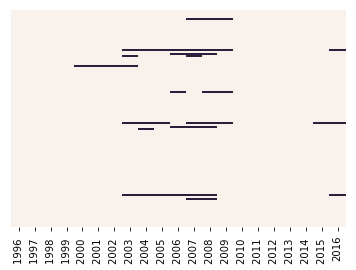

In [47]:
heatdf.head()
fig, ax =  plt.subplots(1)
ax = sns.heatmap(data=heatdf.astype(int), ax=ax, cbar=False, yticklabels=False)

Now we can get rid of all the non-numeric flag that accompany each number:

In [48]:
N = 8
years = list(eurodf.columns[-N:].astype(int))

In [49]:
years

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

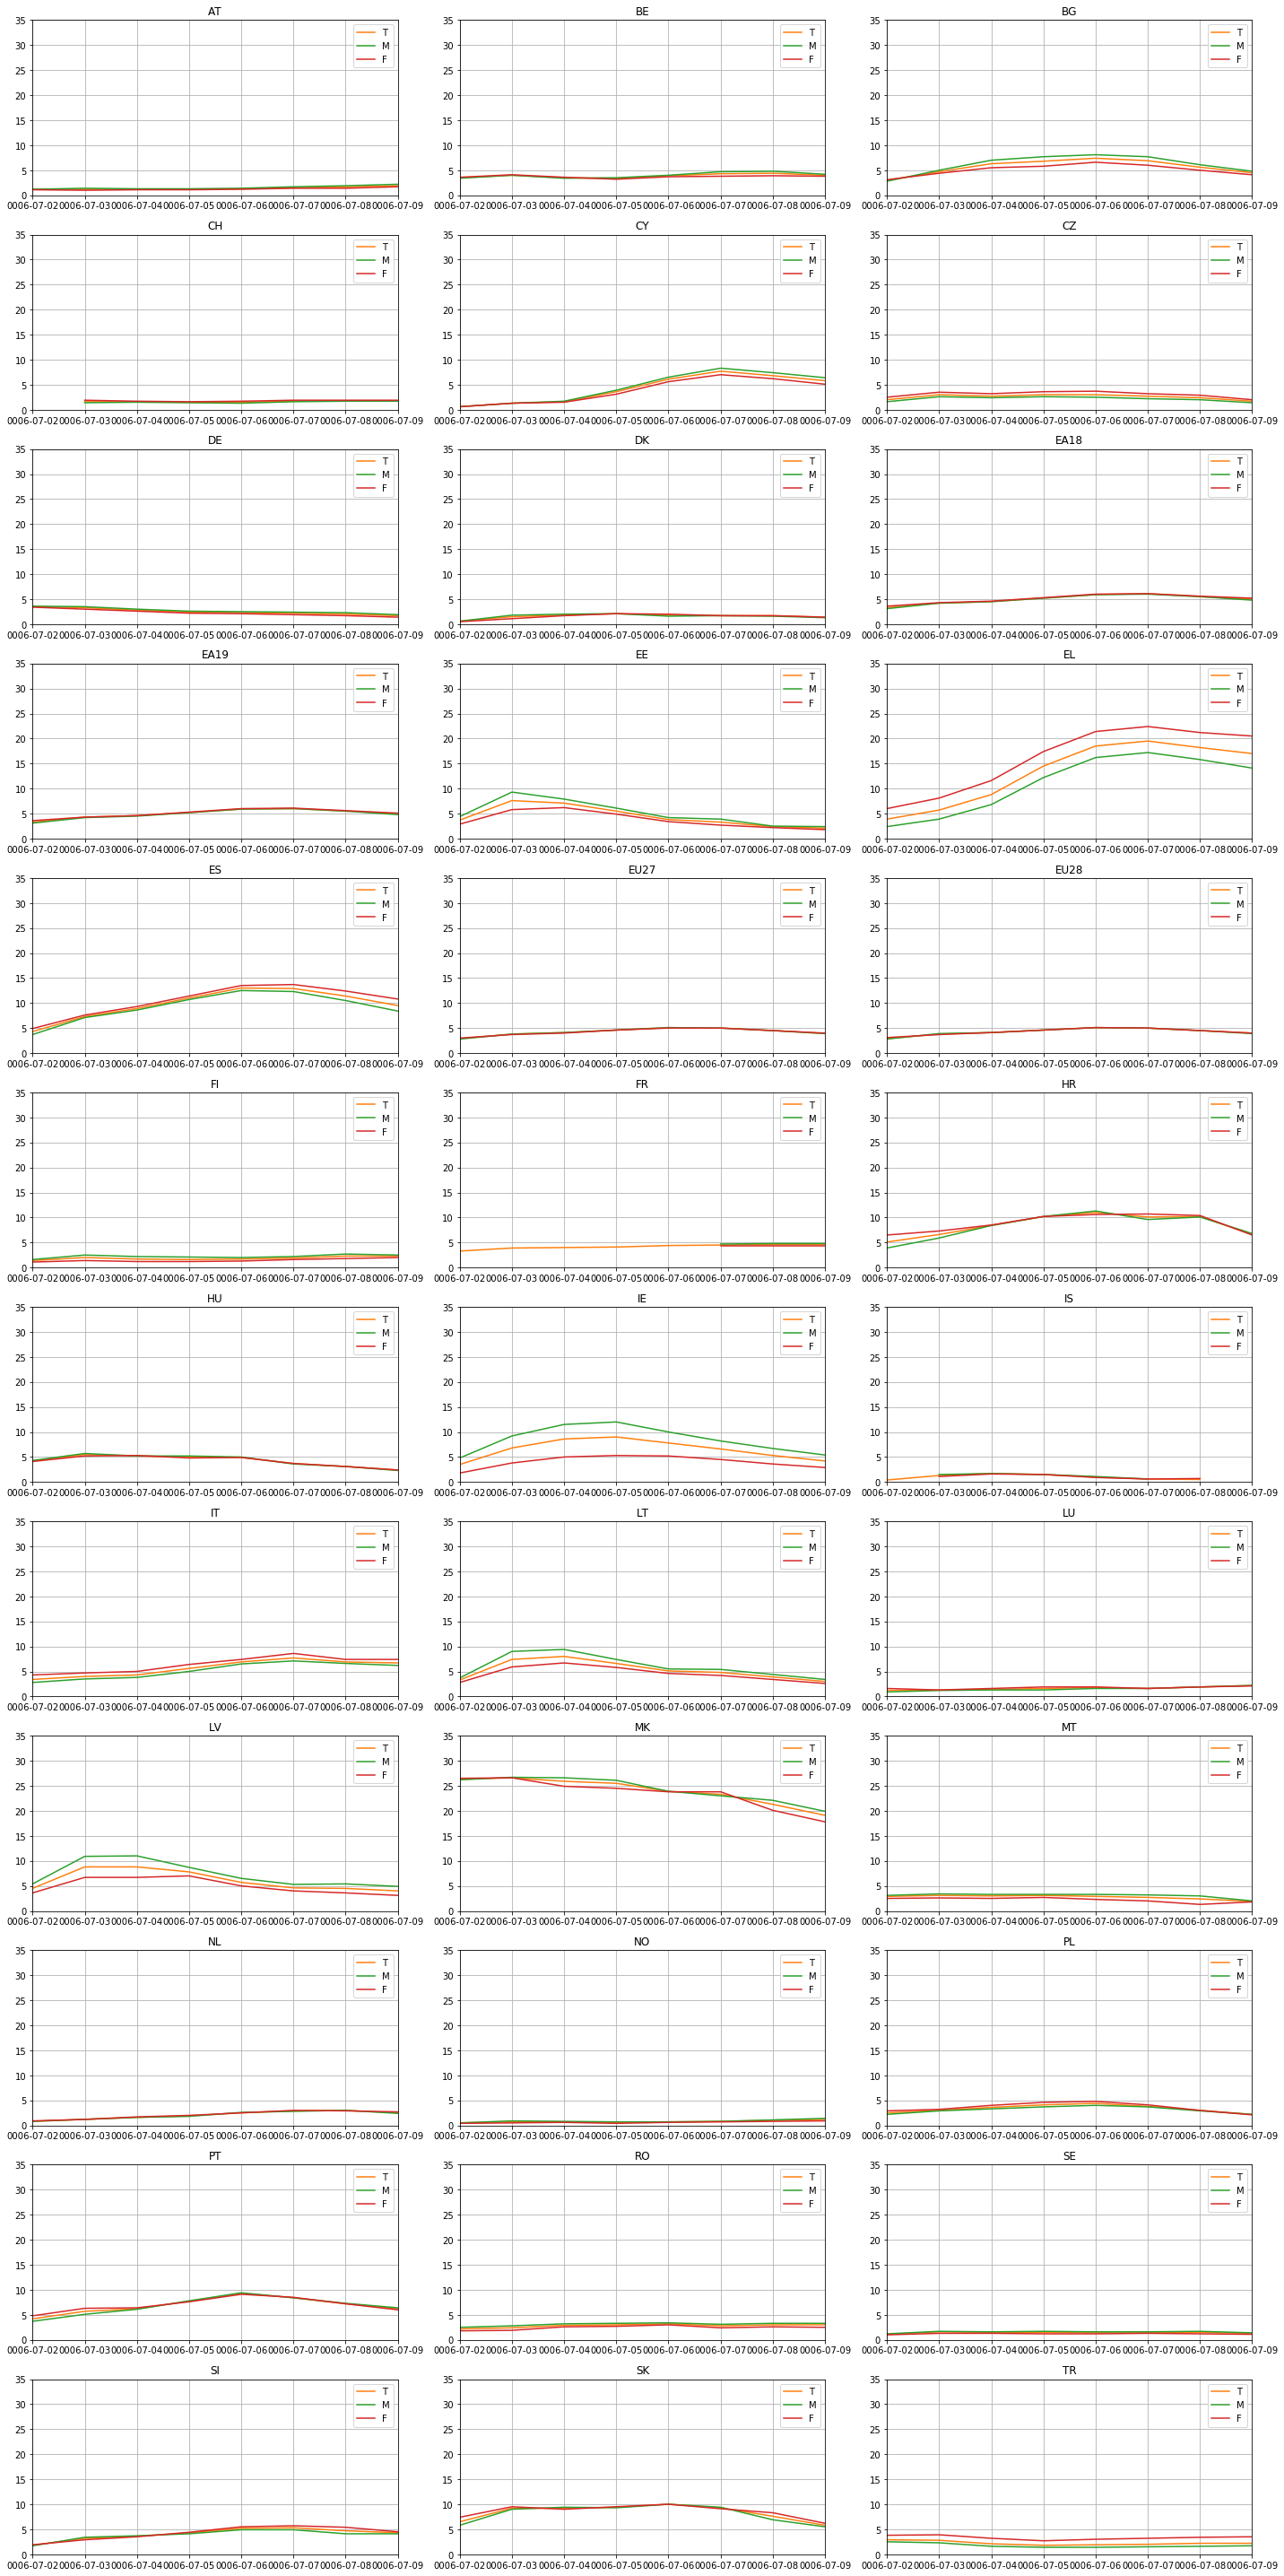

In [50]:
eurodf.replace('u','',regex=True,inplace=True)
eurodf[eurodf.columns[2:]]=eurodf[eurodf.columns[2:]].astype(float)

fig, axes =  plt.subplots(12,3, figsize=[20,40])
totaldf = eurodf[eurodf["sex"]=='T'].reset_index(drop=True)
maledf = eurodf[eurodf["sex"]=='M'].reset_index(drop=True)
femaledf = eurodf[eurodf["sex"]=='F'].reset_index(drop=True)

for i,ax in enumerate(axes.reshape(-1)):
    mpl.style.use('default')
    ax.plot_date(years, totaldf.loc[i][-N:], 'C1', label="T")
    ax.plot_date(years, maledf.loc[i][-N:], 'C2', label="M")
    ax.plot_date(years, femaledf.loc[i][-N:], 'C3', label="F")
    ax.set_title(totaldf.loc[i][1])
    ax.set_ylim(0,35)
    ax.set_xlim(2009,2016)
    ax.set_facecolor('white')
    #ax.set_xticks(np.arange(1996,2016,4))
    ax.legend()
    ax.grid()
fig.tight_layout()
plt.show()

It could be interesting to see which nations have a higher difference in the unemplyment rate for male and women:

In [51]:
diffdf = maledf[maledf.columns[2:]].subtract(femaledf[femaledf.columns[2:]],axis='columns')

In [52]:
diffdf=diffdf.transpose()
diffdf.columns=maledf['country code']

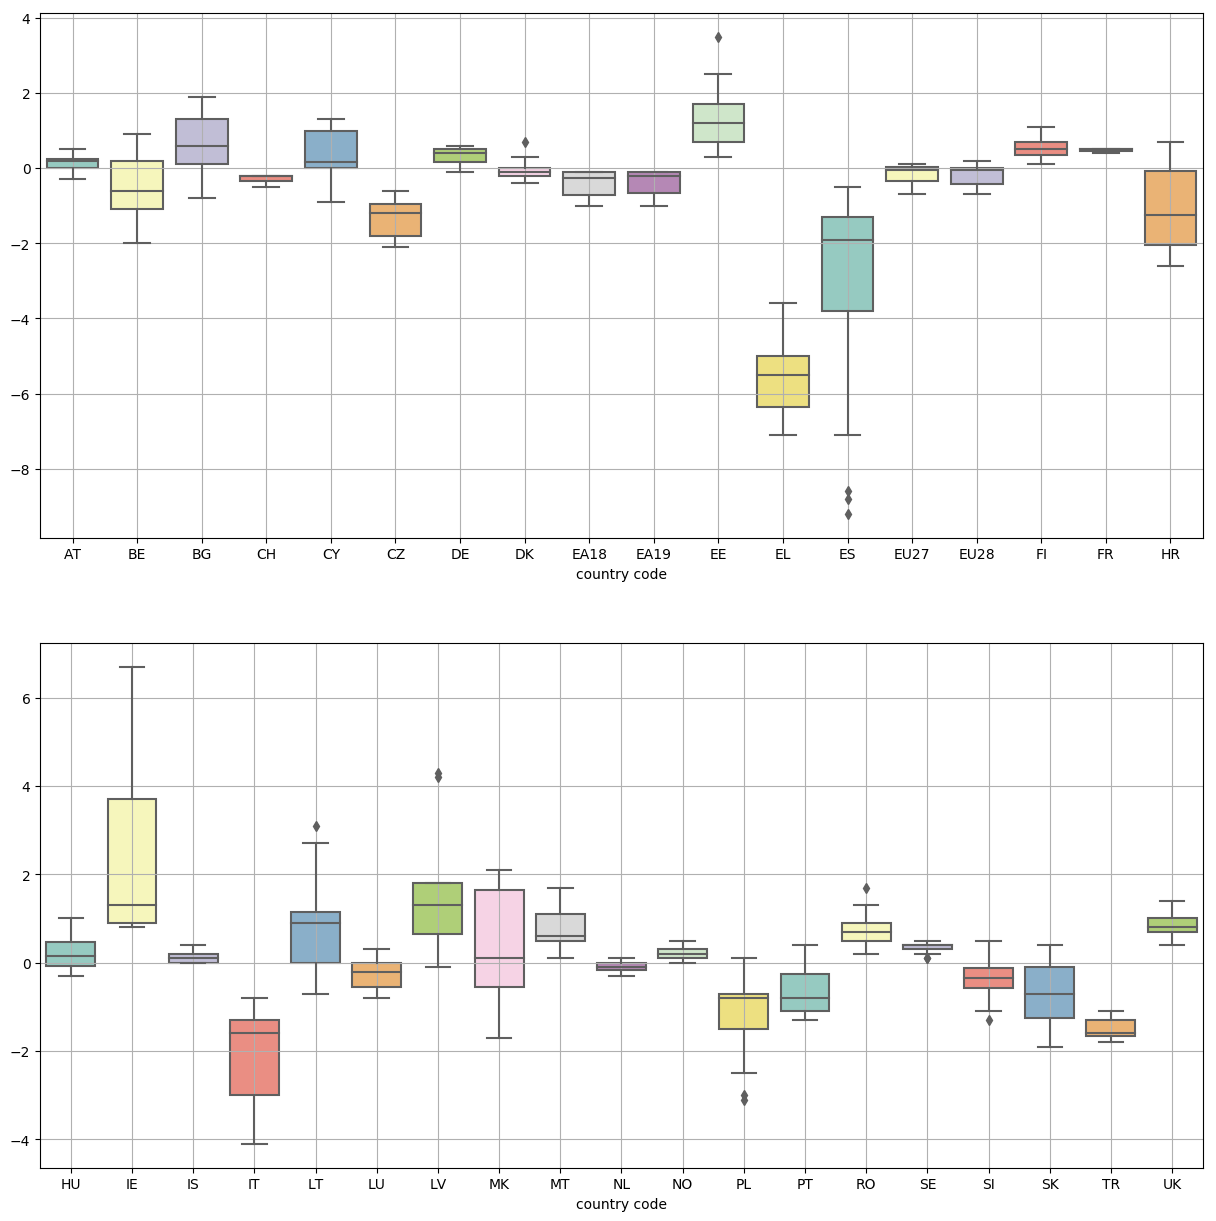

In [53]:
fig2, ax2 =  plt.subplots(2, figsize=(15,15))
sns.boxplot(data=diffdf[diffdf.columns[:18]], palette="Set3", ax = ax2[0])
sns.boxplot(data=diffdf[diffdf.columns[18:]], palette="Set3", ax = ax2[1])
ax2[0].grid()
ax2[1].grid()

In [54]:
chdf = pd.read_excel(DATA_FOLDER + 'chdf_nazionalita.xlsx',header=[0,1])

chdf.head(10)

Cantone        Nazionalità          Settembre 2016  \
        Unnamed: 0_level_1 Tasso di disoccupazione   
Zurigo           stranieri                     5.7   
Zurigo            svizzeri                     2.8   
Berna            stranieri                     5.9   
Berna             svizzeri                     2.0   
Lucerna          stranieri                     4.2   
Lucerna           svizzeri                     1.4   
Uri              stranieri                     3.0   
Uri               svizzeri                     0.6   
Svitto           stranieri                     3.5   
Svitto            svizzeri                     1.2   

Cantone                                                             \
        Tasso di disoccupazione dei giovani Disoccupati registrati   
Zurigo                                  6.7                  13016   
Zurigo                                  3.7                  16446   
Berna                                   7.3                   5220   
Berna                                   2.6                   9296   
Lucerna                                 5.5                   1695   
Lucerna                                 2.1                   2590   
Uri                                     ...                     77   
Uri                                       1                    102   
Svitto                                  3.5                    624   
Svitto                                  0.9                    809   

Cantone                                                      \
        Disoccupati dei giovani Disoccupati di lunga durata   
Zurigo                     1162                        2219   
Zurigo                     2770                        2736   
Berna                       560                         947   
Berna                      1665                        1535   
Lucerna                     254                         229   
Lucerna                     552                         339   
Uri                           8                          12   
Uri                          28                           9   
Svitto                       68                          63   
Svitto                       92                         102   

Cantone                                                       Ottobre 2016  \
        Persone in cerca d'impiego non disoccupate Tasso di disoccupazione   
Zurigo                                        3234                     5.8   
Zurigo                                        3537                     2.8   
Berna                                         2038                     6.3   
Berna                                         2664                     2.0   
Lucerna                                       1333                     4.2   
Lucerna                                       1508                     1.4   
Uri                                             76                     3.9   
Uri                                             77                     0.6   
Svitto                                         398                     3.6   
Svitto                                         351                     1.2   

Cantone                                                             \
        Tasso di disoccupazione dei giovani Disoccupati registrati   
Zurigo                                  6.8                  13320   
Zurigo                                  3.6                  16448   
Berna                                   7.1                   5575   
Berna                                   2.5                   9313   
Lucerna                                 5.3                   1732   
Lucerna                                   2                   2562   
Uri                                     ...                     98   
Uri                                     0.7                     96   
Svitto                                  3.4                    640   
Svitto                                    1   

In [55]:
def new_tasso(months, df, new_column_name, category_to_subtract):
    for month in months:
        chdf[month,new_column_name] = chdf[month,'Tasso di disoccupazione']*(chdf[month,'Disoccupati registrati']-
             chdf[month,category_to_subtract]) /chdf[month,'Disoccupati registrati']

In [57]:
months = ['Novembre 2016',
             'Dicembre 2016',
             'Gennaio 2017',
             'Febbraio 2017',
             'Marzo 2017',
             'Aprile 2017',
             'Maggio 2017',
             'Giugno 2017',
             'Luglio 2017',
             'Agosto 2017',
             'Settembre 2017']
new_tasso(months, chdf, 'tasso senza persone occupate', 'Persone in cerca d\'impiego non disoccupate')
new_tasso(months, chdf, 'tasso senza giovani', 'Disoccupati dei giovani')

In [58]:
chdf.head()

Cantone        Nazionalità          Settembre 2016  \
        Unnamed: 0_level_1 Tasso di disoccupazione   
Zurigo           stranieri                     5.7   
Zurigo            svizzeri                     2.8   
Berna            stranieri                     5.9   
Berna             svizzeri                     2.0   
Lucerna          stranieri                     4.2   

Cantone                                                             \
        Tasso di disoccupazione dei giovani Disoccupati registrati   
Zurigo                                  6.7                  13016   
Zurigo                                  3.7                  16446   
Berna                                   7.3                   5220   
Berna                                   2.6                   9296   
Lucerna                                 5.5                   1695   

Cantone                                                      \
        Disoccupati dei giovani Disoccupati di lunga durata   
Zurigo                     1162                        2219   
Zurigo                     2770                        2736   
Berna                       560                         947   
Berna                      1665                        1535   
Lucerna                     254                         229   

Cantone                                                       Ottobre 2016  \
        Persone in cerca d'impiego non disoccupate Tasso di disoccupazione   
Zurigo                                        3234                     5.8   
Zurigo                                        3537                     2.8   
Berna                                         2038                     6.3   
Berna                                         2664                     2.0   
Lucerna                                       1333                     4.2   

Cantone                                                             \
        Tasso di disoccupazione dei giovani Disoccupati registrati   
Zurigo                                  6.8                  13320   
Zurigo                                  3.6                  16448   
Berna                                   7.1                   5575   
Berna                                   2.5                   9313   
Lucerna                                 5.3                   1732   

Cantone         ...               Dicembre 2016        Gennaio 2017  \
                ...         tasso senza giovani tasso senza giovani   
Zurigo          ...                    5.890680            6.076733   
Zurigo          ...                    2.464555            2.463837   
Berna           ...                    6.633909            6.798351   
Berna           ...                    1.743447            1.836328   
Lucerna         ...                    4.405429            4.736245   

Cantone       Febbraio 2017          Marzo 2017         Aprile 2017  \
        tasso senza giovani tasso senza giovani tasso senza giovani   
Zurigo             5.979103            5.797559            5.553935   
Zurigo             2.394439            2.411787            2.345974   
Berna              6.688418            6.417002            6.171419   
Berna              1.758874            1.779104            1.706804   
Lucerna            4.476504            4.219807            4.091053   

Cantone         Maggio 2017         Giugno 2017         Luglio 2017  \
        tasso senza giovani tasso senza giovani tasso senza giovani   
Zurigo             5.292640            5.202138            5.024789   
Zurigo             2.271463            2.277245            2.221934   
Berna              5.624463            5.148569            4.922114   
Berna              1.641986            1.570065            1.536460   
Lucerna            3.801591            3.619686            3.419547   

Cantone         Agosto 2017      Settembre 2017  
        tasso senza giovani tasso senza giovani  
Zurigo             4.842449            4.855817  
Zurigo

In [145]:
chdf_age = pd.read_excel(DATA_FOLDER + 'chdf_classieta.xlsx',header=[0,1])
chdf_age.head()

Cantone Classi d'età 15-24, 15-49, 50 anni e più                        mese  \
                              Unnamed: 0_level_1 Unnamed: 1_level_1 Metriche   
Zurigo                                       1.0         15-24 anni      NaN   
Zurigo                                       2.0         25-49 anni      NaN   
Zurigo                                       3.0      50 anni e più      NaN   
Berna                                        1.0         15-24 anni      NaN   
Berna                                        2.0         25-49 anni      NaN   

Cantone          Settembre 2016                                      \
        Tasso di disoccupazione Tasso di disoccupazione dei giovani   
Zurigo                      4.3                                 4.3   
Zurigo                      3.7                                 0.0   
Zurigo                      3.1                                 0.0   
Berna                       3.1                                 3.1   
Berna                       2.7                                 0.0   

Cantone                                                 \
        Disoccupati registrati Disoccupati dei giovani   
Zurigo                    3932                    3932   
Zurigo                   18509                       0   
Zurigo                    7021                       0   
Berna                     2225                    2225   
Berna                     8300                       0   

Cantone                              \
        Disoccupati di lunga durata   
Zurigo                           99   
Zurigo                         2842   
Zurigo                         2014   
Berna                            40   
Berna                          1279   

Cantone                                                       Ottobre 2016  \
        Persone in cerca d'impiego non disoccupate Tasso di disoccupazione   
Zurigo                                         519                     4.2   
Zurigo                                        4123                     3.8   
Zurigo                                        2129                     3.1   
Berna                                          371                     3.0   
Berna                                         2782                     2.8   

Cantone                    ...                             Settembre 2017  \
                           ...                     Disoccupati registrati   
Zurigo                     ...                                       3420   
Zurigo                     ...                                      17053   
Zurigo                     ...                                       6752   
Berna                      ...                                       2003   
Berna                      ...                                       7773   

Cantone                                                      \
        Disoccupati dei giovani Disoccupati di lunga durata   
Zurigo                     3420                          77   
Zurigo                        0                        2714   
Zurigo                        0                        1962   
Berna                      2003                          39   
Berna                         0                        1181   

Cantone                                                             Totale  \
        Persone in cerca d'impiego non disoccupate Tasso di disoccupazione   
Zurigo                                         429                     3.8   
Zurigo                                        4218                     3.8   
Zurigo                                        2284                     3.2   
Berna                                          402                     2.8   
Berna                                         2720                     2.8   

Cantone                                                             \
        Tasso di disoccupazione dei giovani Disoccupati registrati   
Zurigo                                  3.8 

In [60]:
new_tasso(months, chdf_age, 'tasso senza persone occupate', 'Persone in cerca d\'impiego non disoccupate')
new_tasso(months, chdf_age, 'tasso senza giovani', 'Disoccupati dei giovani')

In [146]:

chdf_numbers = pd.read_excel(DATA_FOLDER + 'chdf_absolutenumbers.xlsx',header=[0,1])
chdf_numbers.drop(['Classi d\'età 15-24, 15-49, 50 anni e più', 'Unnamed: 2_level_1'], axis=1, level=1,inplace=True)
chdf_numbers.drop('mese', axis=1, level=0, inplace=True)
chdf_numbers.head()
chdf_numbers.columns=chdf_numbers.columns.droplevel(level=1)


In [147]:
chdf_numbers.head()

Cantone Nazionalità Classi d'età 15-24, 15-49, 50 anni e più  Settembre 2016  \
Zurigo    stranieri                                        1            1162   
Zurigo    stranieri                                        2            9570   
Zurigo    stranieri                                        3            2284   
Zurigo    stranieri                                   Totale           13016   
Zurigo     svizzeri                                        1            2770   

Cantone  Ottobre 2016  Novembre 2016  Dicembre 2016  Gennaio 2017  \
Zurigo           1182           1162           1163          1194   
Zurigo           9775          10308          10803         11108   
Zurigo           2363           2518           2648          2758   
Zurigo          13320          13988          14614         15060   
Zurigo           2671           2591           2546          2606   

Cantone  Febbraio 2017  Marzo 2017  Aprile 2017  Maggio 2017  Giugno 2017  \
Zurigo            1185        1147         1009          936          904   
Zurigo           10856       10587        10011         9702         9470   
Zurigo            2746        2648         2552         2459         2350   
Zurigo           14787       14382        13572        13097        12724   
Zurigo            2438        2282         2094         1962         1887   

Cantone  Luglio 2017  Agosto 2017  Settembre 2017  
Zurigo          1084         1049            1015  
Zurigo          9201         8893            8846  
Zurigo          2261         2209            2250  
Zurigo         12546        12151           12111  
Zurigo          2246         2451            2405

In [150]:
chdf_numbers.set_index('Nazionalità', append=True, inplace=True)
chdf_numbers.set_index('Classi d\'età 15-24, 15-49, 50 anni e più', append=True, inplace=True)

In [152]:
chdf_numbers.head(8)

Cantone                                                      Settembre 2016  \
       Nazionalità Classi d'età 15-24, 15-49, 50 anni e più                   
Zurigo stranieri   1                                                   1162   
                   2                                                   9570   
                   3                                                   2284   
                   Totale                                             13016   
       svizzeri    1                                                   2770   
                   2                                                   8939   
                   3                                                   4737   
                   Totale                                             16446   

Cantone                                                      Ottobre 2016  \
       Nazionalità Classi d'età 15-24, 15-49, 50 anni e più                 
Zurigo stranieri   1                                                 1182   
                   2                                                 9775   
                   3                                                 2363   
                   Totale                                           13320   
       svizzeri    1                                                 2671   
                   2                                                 9045   
                   3                                                 4732   
                   Totale                                           16448   

Cantone                                                      Novembre 2016  \
       Nazionalità Classi d'età 15-24, 15-49, 50 anni e più                  
Zurigo stranieri   1                                                  1162   
                   2                                                 10308   
                   3                                                  2518   
                   Totale                                            13988   
       svizzeri    1                                                  2591   
                   2                                                  9209   
                   3                                                  4863   
                   Totale                                            16663   

Cantone                                                      Dicembre 2016  \
       Nazionalità Classi d'età 15-24, 15-49, 50 anni e più                  
Zurigo stranieri   1                                                  1163   
                   2                                                 10803   
                   3                                                  2648   
                   Totale                                            14614   
       svizzeri    1                                                  2546   
                   2                                                  9461   
                   3                                                  4949   
                   Totale                                            16956   

Cantone                                                      Gennaio 2017  \
       Nazionalità Classi d'età 15-24, 15-49, 50 anni e più                 
Zurigo stranieri   1                                                 1194   
                   2                                                11108   
                   3                                                 2758   
                   Totale                                           15060   
       svizzeri    1                                                 2606   
                   2                                                 9721   
                   3                                                 5000   
                   Totale                                           17327   

Cantone                                                      Febbraio 2017  \
       Nazionalità Classi d